C:\Users\Admin\AppData\Local\Temp\ipykernel_1112\2817380863.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   Unnamed: 0  visits  gender   age  income  illness  reduced  health private  \
0           1       1  female  0.19    0.55        1        4       1     yes   
1           2       1  female  0.19    0.45        1        2       1     yes   
2           3       1    male  0.19    0.90        3        0       0      no   
3           4       1    male  0.19    0.15        1        0       0      no   
4           5       1    male  0.19    0.45        2        5       1      no   

  freepoor freerepat nchronic lchronic  
0       no        no       no       no  
1       no        no       no       no  
2       no        no       no       no  
3       no        no       no       no  
4       no        no      yes       no  

Total Number of People by Count of Illness:
 illness
0    1554
1    1638
2     946
3     542
4     274
5     236
Name: count, dtype: int64


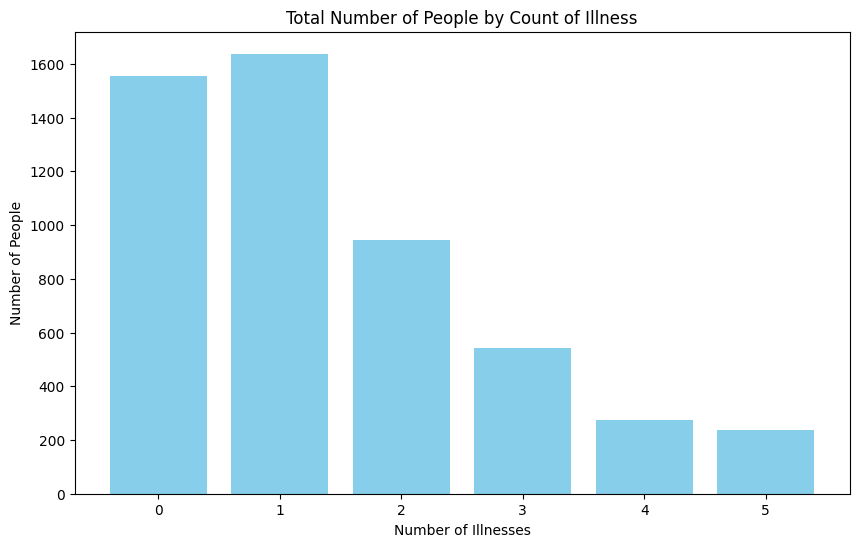

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './DoctorVisits-DA.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Problem Statement 2: Find out the total number of people based on their count of illness
# Group data by the count of illnesses and find the total number of people in each group
illness_counts = data['illness'].value_counts().sort_index()

# Display the results
print("\nTotal Number of People by Count of Illness:\n", illness_counts)

# Plotting the distribution of illness counts
plt.figure(figsize=(10, 6))
plt.bar(illness_counts.index, illness_counts.values, color='skyblue')
plt.title('Total Number of People by Count of Illness')
plt.xlabel('Number of Illnesses')
plt.ylabel('Number of People')
plt.xticks(illness_counts.index)
plt.show()


In [ ]:
# Gender-wise illness analysis: Count the number of illnesses reported by each gender
gender_illness_counts = data.groupby('gender')['illness'].value_counts().unstack().fillna(0)

# Display the results
print("\nGender-wise Illness Counts:\n", gender_illness_counts)

# Plotting the gender-wise illness distribution
gender_illness_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Gender-wise Distribution of Illness Counts')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.legend(title='Number of Illnesses')
plt.show()
